In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18648/1026645/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1627224722&Signature=GPfT22Rh5lLBVaJEYCC8VVz3iJcJoJ67XyZSxwdOHoa%2BoO4OfYavoJLa0js6xaY0BYF8HgIUudItXK6CYM4jIfnqPNcOKrQgvRkkW8f8KSIsH5YleBqCnqLDg4tUPkZ%2BDjQasKG9YUzTBZCEJSVpPsmWXfrLWPAJ5Eu0SI8tu3N%2FjJtgzpo4uN2dJ3R4y3ivIk4zWEPeANKRa7IFG1kdfO%2BJHA2uA1177p2asAMBlU%2Bmnx%2B2AkiVS2F5W1%2BokKlEClUouFXb9%2Bob1RdkyQriFGjzajFJKXxOdgmlqxlkJR95eURFQiCuMIalbX3e%2Fy59PAuj6RfbyDChjhHsQuU5%2BA%3D%3D&response-content-disposition=attachment%3B+filename%3Dplant-pathology-2020-fgvc7.zip" -c -O 'plant-pathology-2020-fgvc7.zip'

--2021-07-24 09:37:10--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18648/1026645/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1627224722&Signature=GPfT22Rh5lLBVaJEYCC8VVz3iJcJoJ67XyZSxwdOHoa%2BoO4OfYavoJLa0js6xaY0BYF8HgIUudItXK6CYM4jIfnqPNcOKrQgvRkkW8f8KSIsH5YleBqCnqLDg4tUPkZ%2BDjQasKG9YUzTBZCEJSVpPsmWXfrLWPAJ5Eu0SI8tu3N%2FjJtgzpo4uN2dJ3R4y3ivIk4zWEPeANKRa7IFG1kdfO%2BJHA2uA1177p2asAMBlU%2Bmnx%2B2AkiVS2F5W1%2BokKlEClUouFXb9%2Bob1RdkyQriFGjzajFJKXxOdgmlqxlkJR95eURFQiCuMIalbX3e%2Fy59PAuj6RfbyDChjhHsQuU5%2BA%3D%3D&response-content-disposition=attachment%3B+filename%3Dplant-pathology-2020-fgvc7.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 817072693 (779M) [application/zip]
Saving to: ‘plant-pathology-20

In [2]:
!unzip plant-pathology-2020-fgvc7.zip

Archive:  plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  inflating: images/Test_1019.jpg    
  inflati

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import random as rn

In [3]:
os.environ['PYTHONHASHSEED'] = '0'

In [4]:
np.random.seed(42)

In [5]:
rn.seed(42)

In [6]:
tf.random.set_seed(42)

In [7]:
df=pd.read_csv("train.csv")

In [ ]:
df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
labels=df.iloc[:,1:].values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


In [ ]:
list_images=os.listdir('images')

In [ ]:
list_images[:5]

['Train_1101.jpg',
 'Train_587.jpg',
 'Test_782.jpg',
 'Test_800.jpg',
 'Train_1007.jpg']

In [ ]:
len(list_images)

3642

In [ ]:
df.shape

(1821, 5)

In [8]:
import matplotlib.image as implt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.columns

Index(['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')

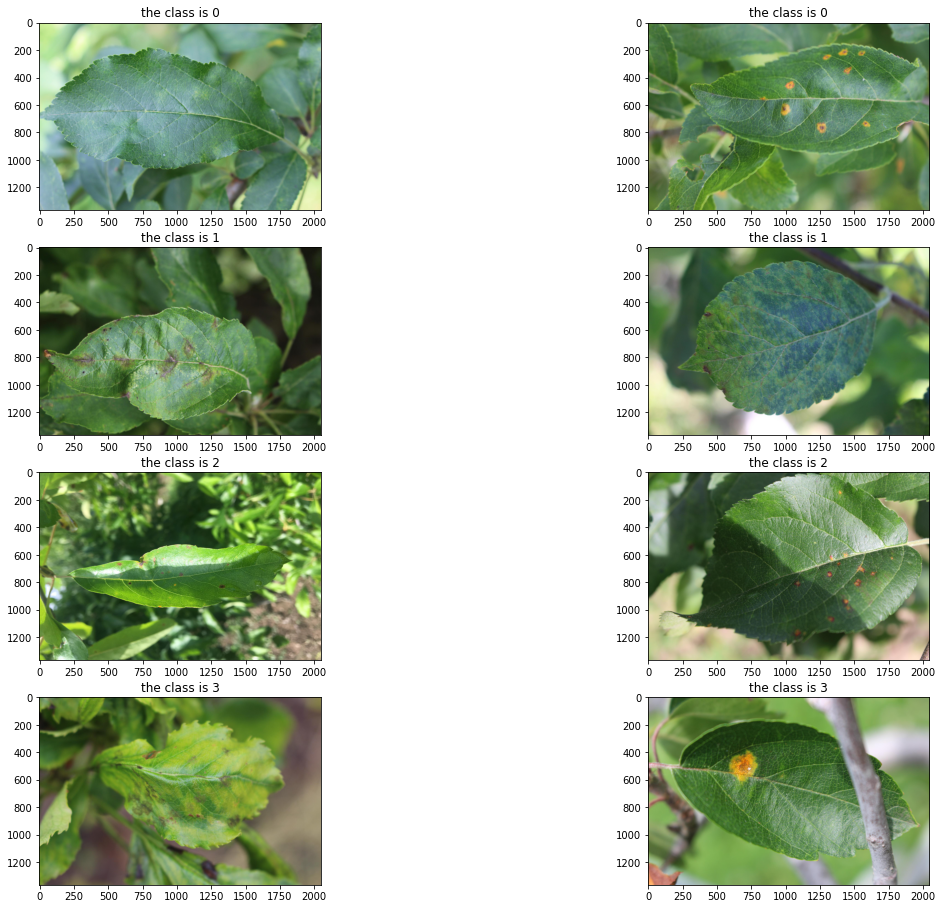

In [ ]:
import random
k=1
cols=list(df.columns)[1:]
plt.subplots(4,2,figsize=(20,20))
for i in range(4):
    temp=df.loc[:,['image_id',cols[i]]]
    for j in range(2):
        image=random.choice(list(temp['image_id']))
        path='images/'+image+'.jpg'
        img=implt.imread(path)
        plt.subplot(5,2,k)
        k+=1
        plt.imshow(img)
        plt.title(f"the class is {i}")

In [ ]:
del list_images

In [8]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [9]:
from tqdm import tqdm

In [10]:
import tensorflow as tf

In [12]:
cols=['healthy', 'multiple_diseases', 'rust', 'scab']

In [ ]:
(np.sum(df.drop('image_id',axis=1),axis=0)/df.shape[0])*100

healthy              28.336079
multiple_diseases     4.997254
rust                 34.157057
scab                 32.509610
dtype: float64

In [ ]:
df['class']=df.apply(lambda x: 0 if x['healthy']==1 else 1 if x['multiple_diseases']==1 else 2 if x['rust']==1 else 3,axis=1)

In [ ]:
df.sample(frac=1).reset_index(inplace=True,drop=True)
df.head()

,image_id,healthy,multiple_diseases,rust,scab,class
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [ ]:
x=df['image_id'].values
y=df['class'].values

In [ ]:
from sklearn.model_selection import StratifiedKFold
stf=StratifiedKFold(n_splits=5)
df['kfolds']=-1
for i,(train,valid) in enumerate(stf.split(x,y)):
    df.loc[valid,'kfolds']=i

In [ ]:
df['image_id']=df['image_id'].apply(lambda x: x+'.jpg')

In [ ]:
df['kfolds'].value_counts()

0    365
4    364
3    364
2    364
1    364
Name: kfolds, dtype: int64

In [ ]:
df.head()

,image_id,healthy,multiple_diseases,rust,scab,class,kfolds
0,Train_0.jpg,0,0,0,1,3,0
1,Train_1.jpg,0,1,0,0,1,0
2,Train_2.jpg,1,0,0,0,0,0
3,Train_3.jpg,0,0,1,0,2,0
4,Train_4.jpg,1,0,0,0,0,0


In [ ]:
train=df[df['kfolds']!=0].drop('kfolds',axis=1).reset_index(drop=True)
test=df[df['kfolds']==0].drop('kfolds',axis=1).reset_index(drop=True)

In [ ]:
train['class'].value_counts()/train.shape[0]

2    0.341346
3    0.324863
0    0.283654
1    0.050137
Name: class, dtype: float64

In [ ]:
test['class'].value_counts()/test.shape[0]

2    0.342466
3    0.326027
0    0.282192
1    0.049315
Name: class, dtype: float64

In [ ]:
train.drop(cols,axis=1,inplace=True)
test.drop(cols,axis=1,inplace=True)

In [ ]:
train['image_id']=train['image_id'].apply(lambda x: 'images/'+x)
test['image_id']=test['image_id'].apply(lambda x: 'images/'+x)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout,Input

## TPU

In [ ]:
def get_image(path,label):
    image=tf.io.read_file(path)
    image=tf.image.decode_jpeg(image)
    image=tf.image.resize(image,(600,600))
    image=image/255.0
    target=tf.one_hot(label,4,dtype=tf.int32)
    return image,target
def augument_data(image,label):
    image=tf.image.flip_left_right(image)
    image=tf.image.flip_up_down(image)
    #image=tf.image.random_brightness(image,0.4)
    return image,label

In [ ]:
batch_size=16
validation_batch_size=8

In [ ]:
dataset=tf.data.Dataset.from_tensor_slices((train['image_id'].values,train['class'].values))
dataset=dataset.map(get_image,num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset=dataset.map(augument_data,num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset=dataset.shuffle(50)
dataset=dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
valid_dataset=tf.data.Dataset.from_tensor_slices((test['image_id'].values,test['class'].values))
valid_dataset=valid_dataset.map(get_image,num_parallel_calls=tf.data.experimental.AUTOTUNE)
valid_dataset=valid_dataset.shuffle(50)
valid_dataset=valid_dataset.batch(validation_batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
next(iter(dataset))

(<tf.Tensor: shape=(16, 600, 600, 3), dtype=float32, numpy=
 array([[[[0.4509804 , 0.5764706 , 0.2509804 ],
          [0.44705883, 0.5803922 , 0.2509804 ],
          [0.44313726, 0.5803922 , 0.2509804 ],
          ...,
          [0.3632841 , 0.3162253 , 0.33191156],
          [0.36619607, 0.31913725, 0.33482352],
          [0.36914405, 0.32208523, 0.3377715 ]],
 
         [[0.4509804 , 0.5764706 , 0.2509804 ],
          [0.44705883, 0.5803922 , 0.2509804 ],
          [0.44313726, 0.5803922 , 0.2509804 ],
          ...,
          [0.3647059 , 0.31764707, 0.33333334],
          [0.37011763, 0.3230588 , 0.3387451 ],
          [0.37254903, 0.3254902 , 0.34117648]],
 
         [[0.44566503, 0.57786435, 0.25882354],
          [0.44313726, 0.5803922 , 0.25882354],
          [0.43221402, 0.5694689 , 0.2479003 ],
          ...,
          [0.3615196 , 0.31446078, 0.3206209 ],
          [0.3649853 , 0.31792647, 0.32034805],
          [0.36921078, 0.32215196, 0.32346895]],
 
         ...,
 
      

In [ ]:
batch_size

16

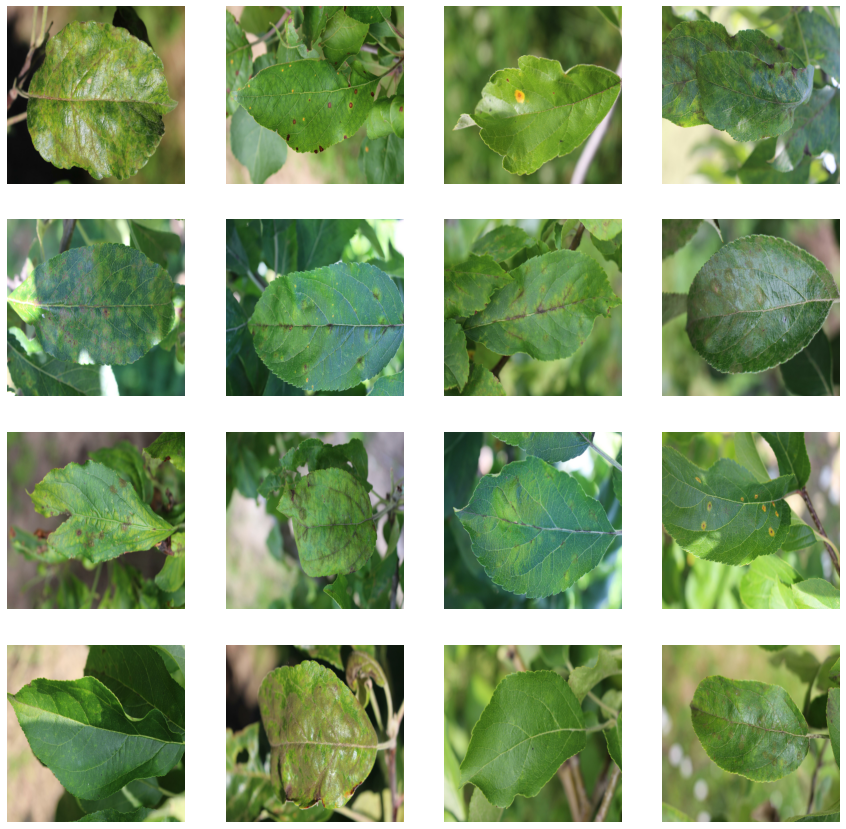

In [ ]:
images,labels=next(iter(dataset))
plt.subplots(4,4,figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i,...])
    plt.axis(False)

In [ ]:
next(iter(valid_dataset))

(<tf.Tensor: shape=(8, 600, 600, 3), dtype=float32, numpy=
 array([[[[0.70497745, 0.70497745, 0.43046764],
          [0.7099323 , 0.70601076, 0.4432657 ],
          [0.7162729 , 0.71226794, 0.4615376 ],
          ...,
          [0.365701  , 0.38530883, 0.2284461 ],
          [0.38438237, 0.4039902 , 0.2432059 ],
          [0.3941402 , 0.41685918, 0.2467415 ]],
 
         [[0.71730393, 0.7136546 , 0.45009282],
          [0.7214382 , 0.71751666, 0.46261472],
          [0.72514707, 0.71730393, 0.4783268 ],
          ...,
          [0.38708663, 0.40669447, 0.24983174],
          [0.39552256, 0.4151304 , 0.2543461 ],
          [0.40350753, 0.42703694, 0.2544879 ]],
 
         [[0.7269608 , 0.7112745 , 0.4610294 ],
          [0.7333137 , 0.7171716 , 0.47690195],
          [0.74191177, 0.7223039 , 0.49656045],
          ...,
          [0.39607844, 0.42352942, 0.25882354],
          [0.40493628, 0.43238726, 0.25983825],
          [0.41561112, 0.44379738, 0.2690425 ]],
 
         ...,
 
       

## GPU

In [12]:
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator,img_to_array

In [ ]:
train_gen=ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,vertical_flip=True)
test_gen=ImageDataGenerator(rescale=1/255.0)

In [ ]:
dataset=train_gen.flow_from_dataframe(dataframe=train,
                                      directory='',
                                      batch_size=16,
                                      image_size=(380,380),
                                      class_mode='raw',
                                      x_col='image_id',
                                      y_col='class')

Found 1456 validated image filenames.


In [ ]:
valid_dataset=test_gen.flow_from_dataframe(dataframe=test,
                                                directory='',
                                                batch_size=8,
                                                image_size=(380,380),
                                                class_mode='raw',
                                               x_col='image_id',y_col='class')

Found 365 validated image filenames.


In [15]:
def get_predictions(dataframe,predictive_model):
  predicted_labels={}
  for image_path in list(dataframe['image_id'].values):
    img=load_img(image_path,target_size=(380,380))
    img=img_to_array(img)/255.0
    img=np.expand_dims(img,axis=0)
    prediction=np.argmax(predictive_model.predict(img),axis=-1)[0]
    predicted_labels[image_path]=prediction
  return predicted_labels

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## densenet

In [ ]:
from tensorflow.keras.applications import DenseNet201,DenseNet121

In [ ]:
kfold_data=[]

In [ ]:
df['image_id']=df['image_id'].apply(lambda x: 'images/'+x)

In [ ]:
df.drop(cols,axis=1,inplace=True)

In [ ]:
df.head()

,image_id,class,kfolds
0,images/Train_0.jpg,3,0
1,images/Train_1.jpg,1,0
2,images/Train_2.jpg,0,0
3,images/Train_3.jpg,2,0
4,images/Train_4.jpg,0,0


In [ ]:
for i in range(5):
  train=df[df['kfolds']!=i].drop('kfolds',axis=1).reset_index(drop=True)
  test=df[df['kfolds']==i].drop('kfolds',axis=1).reset_index(drop=True)
  train_gen=ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,vertical_flip=True)
  test_gen=ImageDataGenerator(rescale=1/255.0)
  dataset=train_gen.flow_from_dataframe(dataframe=train,
                                        directory='',
                                        batch_size=16,
                                        image_size=(380,380),
                                        class_mode='raw',
                                        x_col='image_id',
                                        y_col='class')
  valid_dataset=test_gen.flow_from_dataframe(dataframe=test,
                                                  directory='',
                                                  batch_size=8,
                                                  image_size=(380,380),
                                                  class_mode='raw',
                                                 x_col='image_id',y_col='class')

  tf.keras.backend.clear_session()
  pre_model=DenseNet121(include_top=False,input_shape=(380,380,3),weights='imagenet')
  for layer in pre_model.layers:
      if layer.name.startswith('conv5'):
          layer.trainable=True
      else:
          layer.trainabe=False
  x=pre_model.layers[-1].output
  x=GlobalAveragePooling2D()(x)
  outs=Dense(4,activation='softmax')(x)
  model=Model(inputs=pre_model.input,outputs=outs)
  model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
  def lrfn(epoch):
    lr_start=0.00001
    lr_max=0.0002
    lr_min=0.00001
    lr_rampup_epochs=5
    lr_sustain_epochs=0
    lr_exp_decay=.8
    lr_max = lr_max 
    if epoch < lr_rampup_epochs:
        lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
    elif epoch < lr_rampup_epochs + lr_sustain_epochs:
        lr = lr_max
    else:
        lr = (lr_max - lr_min) *\
             lr_exp_decay**(epoch - lr_rampup_epochs\
                            - lr_sustain_epochs) + lr_min
    return lr
  lr_schedule=tf.keras.callbacks.LearningRateScheduler(lambda epoch:lrfn(epoch),verbose=1)
  saving=tf.keras.callbacks.ModelCheckpoint(filepath=f'densenet_tuning_{i}.h5',monitor='val_loss', verbose=1, 
                                          save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch',)
  model.fit(dataset,validation_data=valid_dataset,epochs=20,callbacks=[lr_schedule,saving])
  del model
  import gc
  gc.collect()
  best_model=tf.keras.models.load_model(f"densenet_tuning_{i}.h5")
  predicted_labels=get_predictions(test,best_model)
  test.drop('class',axis=1,inplace=True)
  test['kfold']=i
  test['predictions']=test['image_id'].map(predicted_labels)
  kfold_data.append(test)
  del best_model
  import gc
  gc.collect()

Found 1456 validated image filenames.
Found 365 validated image filenames.
29089792/29084464 [==============================] - 0s 0us/step
Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
91/91 [==============================] - 112s 754ms/step - loss: 1.4976 - sparse_categorical_accuracy: 0.3984 - val_loss: 1.4248 - val_sparse_categorical_accuracy: 0.3781

Epoch 00001: val_loss improved from inf to 1.42476, saving model to densenet_tuning_0.h5
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 4.8e-05.
91/91 [==============================] - 65s 719ms/step - loss: 0.4549 - sparse_categorical_accuracy: 0.8462 - val_loss: 0.5567 - val_sparse_categorical_accuracy: 0.8192

Epoch 00002: val_loss improved from 1.42476 to 0.55672, saving model to densenet_tuning_0.h5
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 8.6e-05.
91/91 [==============================] - 66s 719ms/step - loss: 0.2299 - sparse_categorical

In [ ]:
dense_net_data=pd.concat(kfold_data,ignore_index=True)

In [ ]:
dense_net_data.head()

,image_id,kfold,predictions
0,images/Train_0.jpg,0,3
1,images/Train_1.jpg,0,1
2,images/Train_2.jpg,0,0
3,images/Train_3.jpg,0,2
4,images/Train_4.jpg,0,0


In [ ]:
dense_net_data['kfold'].value_counts()

0    365
4    364
3    364
2    364
1    364
Name: kfold, dtype: int64

In [ ]:
df.head()

,image_id,class,kfolds
0,images/Train_0.jpg,3,0
1,images/Train_1.jpg,1,0
2,images/Train_2.jpg,0,0
3,images/Train_3.jpg,2,0
4,images/Train_4.jpg,0,0


In [ ]:
df.to_csv('df_kfold.csv',index=False)

In [ ]:
dense_net_data.to_csv('dense_net_data.csv',index=False)

In [ ]:
!cp /content/densenet_tuning_0.h5 /content/drive/MyDrive/plant_models

In [ ]:
!cp /content/densenet_tuning_1.h5 /content/drive/MyDrive/plant_models

In [ ]:
!cp /content/densenet_tuning_2.h5 /content/drive/MyDrive/plant_models

In [ ]:
!cp /content/densenet_tuning_3.h5 /content/drive/MyDrive/plant_models

In [ ]:
!cp /content/densenet_tuning_4.h5 /content/drive/MyDrive/plant_models

In [ ]:
!cp /content/dense_net_data.csv /content/drive/MyDrive/plant_models

In [ ]:
!cp /content/df_kfold.csv /content/drive/MyDrive/plant_models

## Resnet

In [13]:
df=pd.read_csv('/content/drive/MyDrive/plant_models/df_kfold.csv')
from tensorflow.keras.applications import ResNet152V2
kfold_data=[]

In [14]:
df.head()

,image_id,class,kfolds
0,images/Train_0.jpg,3,0
1,images/Train_1.jpg,1,0
2,images/Train_2.jpg,0,0
3,images/Train_3.jpg,2,0
4,images/Train_4.jpg,0,0


In [20]:
def get_predictions(dataframe,predictive_model):
  predicted_labels={}
  for image_path in list(dataframe['image_id'].values):
    img=load_img(image_path,target_size=(380,380))
    img=img_to_array(img)/255.0
    img=np.expand_dims(img,axis=0)
    prediction=np.argmax(predictive_model.predict(img),axis=-1)[0]
    predicted_labels[image_path]=prediction
  return predicted_labels

In [16]:
pre_model=ResNet152V2(include_top=False,input_shape=(380,380,3),weights='imagenet')
pre_model.summary()

234553344/234545216 [==============================] - 2s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 380, 380, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 386, 386, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 190, 190, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 192, 192, 64) 0           conv1_conv[0][0]                 
_____________________

In [21]:
for i in range(5):
  train=df[df['kfolds']!=i].drop('kfolds',axis=1).reset_index(drop=True)
  test=df[df['kfolds']==i].drop('kfolds',axis=1).reset_index(drop=True)
  train_gen=ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,vertical_flip=True,
                               rotation_range=60,width_shift_range=0.2)
  test_gen=ImageDataGenerator(rescale=1/255.0)
  dataset=train_gen.flow_from_dataframe(dataframe=train,
                                        directory='',
                                        batch_size=16,
                                        image_size=(380,380),
                                        class_mode='raw',
                                        x_col='image_id',
                                        y_col='class')
  valid_dataset=test_gen.flow_from_dataframe(dataframe=test,
                                                  directory='',
                                                  batch_size=8,
                                                  image_size=(380,380),
                                                  class_mode='raw',
                                                 x_col='image_id',y_col='class')

  tf.keras.backend.clear_session()
  pre_model=ResNet152V2(include_top=False,input_shape=(380,380,3),weights='imagenet')
  for layer in pre_model.layers:
    if layer.name.startswith('conv5'):
      layer.trainable=True
    else:
      layer.trainable=False
  x=pre_model.layers[-1].output
  x=GlobalAveragePooling2D()(x)
  outs=Dense(4,activation='softmax')(x)
  model=Model(inputs=pre_model.input,outputs=outs)
  model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
  def lrfn(epoch):
    lr_start=0.00001
    lr_max=0.0002
    lr_min=0.00001
    lr_rampup_epochs=5
    lr_sustain_epochs=0
    lr_exp_decay=.8
    lr_max = lr_max 
    if epoch < lr_rampup_epochs:
        lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
    elif epoch < lr_rampup_epochs + lr_sustain_epochs:
        lr = lr_max
    else:
        lr = (lr_max - lr_min) *\
             lr_exp_decay**(epoch - lr_rampup_epochs\
                            - lr_sustain_epochs) + lr_min
    return lr
  lr_schedule=tf.keras.callbacks.LearningRateScheduler(lambda epoch:lrfn(epoch),verbose=1)
  saving=tf.keras.callbacks.ModelCheckpoint(filepath=f'resnet152v2_tuning{i}.h5',monitor='val_loss', verbose=1, 
                                          save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch',)
  model.fit(dataset,validation_data=valid_dataset,epochs=20,callbacks=[lr_schedule,saving])
  del model
  import gc
  gc.collect()
  best_model=tf.keras.models.load_model(f"resnet152v2_tuning{i}.h5")
  predicted_labels=get_predictions(test,best_model)
  test.drop('class',axis=1,inplace=True)
  test['kfold']=i
  test['predictions']=test['image_id'].map(predicted_labels)
  kfold_data.append(test)
  del best_model
  import gc
  gc.collect()

Found 1456 validated image filenames.
Found 365 validated image filenames.
Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
91/91 [==============================] - 96s 933ms/step - loss: 1.1040 - sparse_categorical_accuracy: 0.5240 - val_loss: 0.9829 - val_sparse_categorical_accuracy: 0.5699

Epoch 00001: val_loss improved from inf to 0.98289, saving model to resnet152v2_tuning0.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 4.8e-05.
91/91 [==============================] - 81s 888ms/step - loss: 0.6542 - sparse_categorical_accuracy: 0.7761 - val_loss: 0.5398 - val_sparse_categorical_accuracy: 0.8247

Epoch 00002: val_loss improved from 0.98289 to 0.53981, saving model to resnet152v2_tuning0.h5
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 8.6e-05.
91/91 [==============================] - 80s 879ms/step - loss: 0.4759 - sparse_categorical_accuracy: 0.8242 - val_loss: 0.4566 - val_sparse_categorical_accuracy: 0.8438

Epoch 00003: val_loss improved from 0.53981 to 0.45656, saving model to resnet152v2_tuning0.h5
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000124.
91/91 [==============================] - 80s 883ms/step - loss: 0.4179 - sparse_categorical_accuracy: 0.8654 - val_loss: 0.4229 - val_sparse_categorical_accuracy: 0.8411

Epoch 00004: val_loss improved from 0.45656 to 0.4

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 4.8e-05.
92/92 [==============================] - 80s 873ms/step - loss: 0.6610 - sparse_categorical_accuracy: 0.7584 - val_loss: 0.5980 - val_sparse_categorical_accuracy: 0.8104

Epoch 00002: val_loss improved from 0.98852 to 0.59800, saving model to resnet152v2_tuning1.h5
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 8.6e-05.
92/92 [==============================] - 80s 868ms/step - loss: 0.4878 - sparse_categorical_accuracy: 0.8332 - val_loss: 0.4349 - val_sparse_categorical_accuracy: 0.8571

Epoch 00003: val_loss improved from 0.59800 to 0.43492, saving model to resnet152v2_tuning1.h5
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000124.
92/92 [==============================] - 80s 865ms/step - loss: 0.4278 - sparse_categorical_accuracy: 0.8552 - val_loss: 0.5019 - val_sparse_categorical_accuracy: 0.8379

Epoch 00004: val_loss did not improve from 0.43492

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 4.8e-05.
92/92 [==============================] - 80s 871ms/step - loss: 0.6700 - sparse_categorical_accuracy: 0.7612 - val_loss: 0.5642 - val_sparse_categorical_accuracy: 0.8022

Epoch 00002: val_loss improved from 0.91984 to 0.56418, saving model to resnet152v2_tuning2.h5
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 8.6e-05.
30/92 [========>.....................] - ETA: 46s - loss: 0.5108 - sparse_categorical_accuracy: 0.8083

KeyboardInterrupt: ignored

In [ ]:
resnet_data=pd.concat(kfold_data,ignore_index=True
resnet_data.to_csv('resnet_data.csv',index=False)

## Xception

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/plant_models/df_kfold.csv')
from tensorflow.keras.applications import Xception
kfold_data=[]

In [ ]:
pre_model=Xception(include_top=False,input_shape=(600,600,3),weights='imagenet')
pre_model.summary()

83689472/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 600, 600, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 299, 299, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 299, 299, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 299, 299, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [ ]:
len(pre_model.layers)

132

In [ ]:
pre_model.layers[132-36].name

'block11_sepconv1_act'

In [ ]:
132-36

96

In [ ]:
def get_predictions(dataframe,predictive_model):
  predicted_labels={}
  for image_path in list(dataframe['image_id'].values):
    img=load_img(image_path,target_size=(600,600))
    img=img_to_array(img)/255.0
    img=np.expand_dims(img,axis=0)
    prediction=np.argmax(predictive_model.predict(img),axis=-1)[0]
    predicted_labels[image_path]=prediction
  return predicted_labels

In [ ]:
for i in range(5):
  train=df[df['kfolds']!=i].drop('kfolds',axis=1).reset_index(drop=True)
  test=df[df['kfolds']==i].drop('kfolds',axis=1).reset_index(drop=True)
  train_gen=ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,vertical_flip=True)
  test_gen=ImageDataGenerator(rescale=1/255.0)
  dataset=train_gen.flow_from_dataframe(dataframe=train,
                                        directory='',
                                        batch_size=16,
                                        image_size=(600,600),
                                        class_mode='raw',
                                        x_col='image_id',
                                        y_col='class')
  valid_dataset=test_gen.flow_from_dataframe(dataframe=test,
                                                  directory='',
                                                  batch_size=8,
                                                  image_size=(600,600),
                                                  class_mode='raw',
                                                 x_col='image_id',y_col='class')

  tf.keras.backend.clear_session()
  pre_model=Xception(include_top=False,input_shape=(600,600,3),weights='imagenet')
  for l_no,layer in enumerate(pre_model.layers):
    if l_no>=96:
      layer.trainable=True
    else:
      layer.trainable=False
  x=pre_model.layers[-1].output
  x=GlobalAveragePooling2D()(x)
  outs=Dense(4,activation='softmax')(x)
  model=Model(inputs=pre_model.input,outputs=outs)
  model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
  def lrfn(epoch):
    lr_start=0.00001
    lr_max=0.0002
    lr_min=0.00001
    lr_rampup_epochs=5
    lr_sustain_epochs=0
    lr_exp_decay=.8
    lr_max = lr_max 
    if epoch < lr_rampup_epochs:
        lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
    elif epoch < lr_rampup_epochs + lr_sustain_epochs:
        lr = lr_max
    else:
        lr = (lr_max - lr_min) *\
             lr_exp_decay**(epoch - lr_rampup_epochs\
                            - lr_sustain_epochs) + lr_min
    return lr
  lr_schedule=tf.keras.callbacks.LearningRateScheduler(lambda epoch:lrfn(epoch),verbose=1)
  saving=tf.keras.callbacks.ModelCheckpoint(filepath=f'Xception_tuning{i}.h5',monitor='val_loss', verbose=1, 
                                          save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch',)
  model.fit(dataset,validation_data=valid_dataset,epochs=20,callbacks=[lr_schedule,saving])
  del model
  import gc
  gc.collect()
  best_model=tf.keras.models.load_model(f"Xception_tuning{i}.h5")
  predicted_labels=get_predictions(test,best_model)
  test.drop('class',axis=1,inplace=True)
  test['kfold']=i
  test['predictions']=test['image_id'].map(predicted_labels)
  kfold_data.append(test)
  del best_model
  import gc
  gc.collect()

Found 1456 validated image filenames.
Found 365 validated image filenames.
83689472/83683744 [==============================] - 0s 0us/step
Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
91/91 [==============================] - 100s 715ms/step - loss: 1.2785 - sparse_categorical_accuracy: 0.4540 - val_loss: 1.1077 - val_sparse_categorical_accuracy: 0.4849

Epoch 00001: val_loss improved from inf to 1.10769, saving model to Xception_tuning0.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 4.8e-05.
91/91 [==============================] - 63s 690ms/step - loss: 0.7004 - sparse_categorical_accuracy: 0.7837 - val_loss: 0.4465 - val_sparse_categorical_accuracy: 0.8630

Epoch 00002: val_loss improved from 1.10769 to 0.44655, saving model to Xception_tuning0.h5
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 8.6e-05.
91/91 [==============================] - 63s 693ms/step - loss: 0.3807 - sparse_categorical_accuracy: 0.8668 - val_loss: 0.4777 - val_sparse_categorical_accuracy: 0.8603

Epoch 00003: val_loss did not improve from 0.44655
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000124.
91/91 [==============================] - 62s 681ms/step - loss: 0.2630 - sparse_categorical_accuracy: 0.9121 - val_loss: 0.4145 - val_sparse_categorical_accuracy: 0.8740

Epoch 00004: val_loss improved from 0.44655 to 0.41452, saving model to Xception_tuning0.h5
Epoch

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 4.8e-05.
92/92 [==============================] - 63s 690ms/step - loss: 0.7222 - sparse_categorical_accuracy: 0.7790 - val_loss: 0.4466 - val_sparse_categorical_accuracy: 0.8626

Epoch 00002: val_loss improved from 1.04422 to 0.44664, saving model to Xception_tuning1.h5
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 8.6e-05.
92/92 [==============================] - 63s 684ms/step - loss: 0.3692 - sparse_categorical_accuracy: 0.8744 - val_loss: 0.3837 - val_sparse_categorical_accuracy: 0.8846

Epoch 00003: val_loss improved from 0.44664 to 0.38367, saving model to Xception_tuning1.h5
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000124.
92/92 [==============================] - 63s 681ms/step - loss: 0.2746 - sparse_categorical_accuracy: 0.9101 - val_loss: 0.3636 - val_sparse_categorical_accuracy: 0.8709

Epoch 00004: val_loss improved from 0.38367 to 0.36361, 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 4.8e-05.
92/92 [==============================] - 62s 671ms/step - loss: 0.6905 - sparse_categorical_accuracy: 0.7962 - val_loss: 0.4854 - val_sparse_categorical_accuracy: 0.8324

Epoch 00002: val_loss improved from 1.12226 to 0.48538, saving model to Xception_tuning2.h5
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 8.6e-05.
92/92 [==============================] - 62s 673ms/step - loss: 0.3960 - sparse_categorical_accuracy: 0.8641 - val_loss: 0.3515 - val_sparse_categorical_accuracy: 0.8901

Epoch 00003: val_loss improved from 0.48538 to 0.35147, saving model to Xception_tuning2.h5
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000124.
92/92 [==============================] - 61s 664ms/step - loss: 0.2644 - sparse_categorical_accuracy: 0.9128 - val_loss: 0.3439 - val_sparse_categorical_accuracy: 0.8709

Epoch 00004: val_loss improved from 0.35147 to 0.34394, 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 4.8e-05.
92/92 [==============================] - 62s 676ms/step - loss: 0.6677 - sparse_categorical_accuracy: 0.8016 - val_loss: 0.4925 - val_sparse_categorical_accuracy: 0.8324

Epoch 00002: val_loss improved from 1.05342 to 0.49253, saving model to Xception_tuning3.h5
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 8.6e-05.
92/92 [==============================] - 61s 664ms/step - loss: 0.3636 - sparse_categorical_accuracy: 0.8744 - val_loss: 0.3782 - val_sparse_categorical_accuracy: 0.8736

Epoch 00003: val_loss improved from 0.49253 to 0.37824, saving model to Xception_tuning3.h5
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000124.
92/92 [==============================] - 62s 677ms/step - loss: 0.2739 - sparse_categorical_accuracy: 0.9005 - val_loss: 0.4559 - val_sparse_categorical_accuracy: 0.8489

Epoch 00004: val_loss did not improve from 0.37824
Epoch

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 4.8e-05.
92/92 [==============================] - 62s 673ms/step - loss: 0.7306 - sparse_categorical_accuracy: 0.7769 - val_loss: 0.4781 - val_sparse_categorical_accuracy: 0.8434

Epoch 00002: val_loss improved from 1.08330 to 0.47811, saving model to Xception_tuning4.h5
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 8.6e-05.
92/92 [==============================] - 63s 684ms/step - loss: 0.3925 - sparse_categorical_accuracy: 0.8634 - val_loss: 0.3951 - val_sparse_categorical_accuracy: 0.8626

Epoch 00003: val_loss improved from 0.47811 to 0.39505, saving model to Xception_tuning4.h5
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000124.
92/92 [==============================] - 63s 680ms/step - loss: 0.2844 - sparse_categorical_accuracy: 0.8936 - val_loss: 0.3428 - val_sparse_categorical_accuracy: 0.8709

Epoch 00004: val_loss improved from 0.39505 to 0.34285, 

In [ ]:
Xception_data=pd.concat(kfold_data,ignore_index=True)
Xception_data.to_csv('Xception_data.csv',index=False)

In [ ]:
!cp /content/Xception_tuning0.h5 /content/drive/MyDrive/plant_models
!cp /content/Xception_tuning1.h5 /content/drive/MyDrive/plant_models
!cp /content/Xception_tuning2.h5 /content/drive/MyDrive/plant_models
!cp /content/Xception_tuning3.h5 /content/drive/MyDrive/plant_models
!cp /content/Xception_tuning4.h5 /content/drive/MyDrive/plant_models
!cp /content/Xception_data.csv /content/drive/MyDrive/plant_models

## efficient

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/plant_models/df_kfold.csv')

In [ ]:
df.head()

,image_id,class,kfolds
0,images/Train_0.jpg,3,0
1,images/Train_1.jpg,1,0
2,images/Train_2.jpg,0,0
3,images/Train_3.jpg,2,0
4,images/Train_4.jpg,0,0


In [ ]:
from tensorflow.keras.applications import EfficientNetB4,EfficientNetB7,EfficientNetB6

In [ ]:
kfold_data=[]

In [ ]:
def get_predictions(dataframe,predictive_model):
  predicted_labels={}
  for image_path in list(dataframe['image_id'].values):
    img=load_img(image_path,target_size=(600,600))
    img=img_to_array(img)/255.0
    img=np.expand_dims(img,axis=0)
    prediction=np.argmax(predictive_model.predict(img),axis=-1)[0]
    predicted_labels[image_path]=prediction
  return predicted_labels

In [ ]:
for i in range(5):
  train=df[df['kfolds']!=i].drop('kfolds',axis=1).reset_index(drop=True)
  test=df[df['kfolds']==i].drop('kfolds',axis=1).reset_index(drop=True)
  train_gen=ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,vertical_flip=True)
  test_gen=ImageDataGenerator(rescale=1/255.0)
  dataset=train_gen.flow_from_dataframe(dataframe=train,
                                        directory='',
                                        batch_size=16,
                                        image_size=(600,600),
                                        class_mode='raw',
                                        x_col='image_id',
                                        y_col='class')
  valid_dataset=test_gen.flow_from_dataframe(dataframe=test,
                                                  directory='',
                                                  batch_size=8,
                                                  image_size=(600,600),
                                                  class_mode='raw',
                                                 x_col='image_id',y_col='class')

  tf.keras.backend.clear_session()
  pre_model=EfficientNetB7(include_top=False,input_shape=(600,600,3),weights='imagenet')
  for layer in pre_model.layers:
    if layer.name.startswith('block7') or layer.name.startswith('block6'):
      layer.trainable=True
    else:
      layer.trainable=False
  x=pre_model.layers[-1].output
  x=GlobalAveragePooling2D()(x)
  outs=Dense(4,activation='softmax')(x)
  model=Model(inputs=pre_model.input,outputs=outs)
  model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
  def lrfn(epoch):
    lr_start=0.00001
    lr_max=0.0002
    lr_min=0.00001
    lr_rampup_epochs=5
    lr_sustain_epochs=0
    lr_exp_decay=.8
    lr_max = lr_max 
    if epoch < lr_rampup_epochs:
        lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
    elif epoch < lr_rampup_epochs + lr_sustain_epochs:
        lr = lr_max
    else:
        lr = (lr_max - lr_min) *\
             lr_exp_decay**(epoch - lr_rampup_epochs\
                            - lr_sustain_epochs) + lr_min
    return lr
  lr_schedule=tf.keras.callbacks.LearningRateScheduler(lambda epoch:lrfn(epoch),verbose=1)
  saving=tf.keras.callbacks.ModelCheckpoint(filepath=f'effb7_tuning_{i}.h5',monitor='val_loss', verbose=1, 
                                          save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch',)
  model.fit(dataset,validation_data=valid_dataset,epochs=20,callbacks=[lr_schedule,saving])
  del model
  import gc
  gc.collect()
  best_model=tf.keras.models.load_model(f"effb7_tuning_{i}.h5")
  predicted_labels=get_predictions(test,best_model)
  test.drop('class',axis=1,inplace=True)
  test['kfold']=i
  test['predictions']=test['image_id'].map(predicted_labels)
  kfold_data.append(test)
  del best_model
  import gc
  gc.collect()

Found 1456 validated image filenames.
Found 365 validated image filenames.
258080768/258076736 [==============================] - 2s 0us/step
Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
91/91 [==============================] - 140s 945ms/step - loss: 1.3009 - sparse_categorical_accuracy: 0.3331 - val_loss: 1.4641 - val_sparse_categorical_accuracy: 0.0493

Epoch 00001: val_loss improved from inf to 1.46415, saving model to effb7_tuning_0.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 4.8e-05.
91/91 [==============================] - 80s 880ms/step - loss: 1.2687 - sparse_categorical_accuracy: 0.3201 - val_loss: 1.4354 - val_sparse_categorical_accuracy: 0.3425

Epoch 00002: val_loss improved from 1.46415 to 1.43540, saving model to effb7_tuning_0.h5
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 8.6e-05.
91/91 [==============================] - 80s 878ms/step - loss: 1.2671 - sparse_categorical_accuracy: 0.3359 - val_loss: 1.2819 - val_sparse_categorical_accuracy: 0.3425

Epoch 00003: val_loss improved from 1.43540 to 1.28188, saving model to effb7_tuning_0.h5
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000124.
91/91 [==============================] - 80s 881ms/step - loss: 1.2659 - sparse_categorical_accuracy: 0.3249 - val_loss: 1.2449 - val_sparse_categorical_accuracy: 0.3425

Epoch 00004: val_loss improved from 1.28188 to 1.24492, savi

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 4.8e-05.
65/92 [====================>.........] - ETA: 19s - loss: 1.2648 - sparse_categorical_accuracy: 0.3385

KeyboardInterrupt: ignored

In [ ]:
effb6_data=pd.concat(kfold_data,ignore_index=True)
effb6_data.to_csv('effb6_data.csv',index=False)

In [ ]:
effb6_data.head()

In [ ]:
!cp /content/effb4_tuning_0.h5 /content/drive/MyDrive/plant_models
!cp /content/effb4_tuning_1.h5 /content/drive/MyDrive/plant_models
!cp /content/effb4_tuning_2.h5 /content/drive/MyDrive/plant_models
!cp /content/effb4_tuning_3.h5 /content/drive/MyDrive/plant_models
!cp /content/effb4_tuning_4.h5 /content/drive/MyDrive/plant_models
!cp /content/effb6_data.csv /content/drive/MyDrive/plant_models

In [ ]:
tf.keras.backend.clear_session()
pre_model=EfficientNetB7(include_top=False,input_shape=(600,600,3),weights='imagenet')
for i in range(len(pre_model.layers)):
    if i>=795:
        pre_model.layers[i].trainable=True
    else:
        pre_model.layers[i].trainable=False
x=pre_model.layers[-1].output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
outs=Dense(4,activation='softmax')(x)
model=Model(inputs=pre_model.input,outputs=outs)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])



In [ ]:
saver=tf.keras.callbacks.ModelCheckpoint(filepath='effb7_one_cycle.h5',save_best_only=True,save_freq='epoch',
                                        monitor='val_loss',mode='min',verbose=1)

In [ ]:
model.fit(trainer,validation_data=tester,epochs=40,callbacks=[lr_schedule,saver])

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(model.history.history.get('loss'),label='loss',color='red')
plt.plot(model.history.history.get('val_loss'),label='val_loss',color='green')
plt.grid(alpha=0.4)
plt.legend(loc=0)
plt.show()